
# **Problem Statement:** 
Analyze and predict the viewership and success of movies and TV shows on a streaming platform based on various attributes such as type, title, director, cast, country, date added, release year, rating, duration, listed in, and description. 

Specifically, I want to answer the following questions and perform tasks related to this dataset:

1. **Viewership and Popularity Analysis:** 
   - What are the most popular types of content on the platform (Movies or TV Shows)?
   - Which countries contribute the most content?
   - Does the release year affect the popularity of content?

2. **Content Duration Analysis:**

   - Are there any trends in content duration over the years?
   
3. **Genre Analysis:**
   - Which genres are most prevalent on the platform?
   - Are there any trends in the popularity of specific genres?

4. **Country Analysis:**
   - Do viewers have a preference for content from certain countries?  

4. **Predictive Modeling:**
   - Can we build a model to predict the success (e.g., viewership, ratings) of a movie or TV show based on its attributes?


By addressing these questions and tasks, the streaming platform can gain insights into its content library, viewer preferences

# Regarding Dataset 

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

***Description of each column in the dataset:***

1. **show_id:** A unique identifier for each show or movie.
   
2. **type:** The type of content, either "Movie" or "TV Show."

3. **title:** The title of the movie or TV show.

4. **director:** The director of the movie or TV show. In the first and third entries, this information is not available (NaN).

5. **cast:** The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."

6. **country:** The country where the movie or TV show was produced or is associated with.

7. **date_added:** The date when the content was added to the streaming platform, in the format "Month Day, Year."

8. **release_year:** The year the movie or TV show was originally released.

9. **rating:** The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").

10. **duration:** The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").

11. **listed_in:** The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").

12. **description:** A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings ("ignore")

# Exploring The Dataset

In [2]:
netflix_data = pd.read_csv('netflix_titles.csv')

In [3]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
netflix_data.shape

(8807, 12)

In [5]:
print(netflix_data.info(), "\n")
print(netflix_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description   

In [6]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [7]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
netflix_data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

# Analyzing the Data

**Netflix Data Null Percentage Analysis**

Perform an analysis of null (missing) values in a dataset, specifically a dataset related to Netflix content. the column names and their corresponding null percentages, making it easy to identify which columns have the most missing data

In [9]:
null_counts = netflix_data.isnull().sum()
total_rows = len(netflix_data)
null_percentage = (null_counts / total_rows) * 100
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)
null_percentage_df.reset_index(drop=True, inplace=True)
print(null_percentage_df)

     Column Name  Null Percentage
0       director        29.908028
1        country         9.435676
2           cast         9.367549
3     date_added         0.113546
4         rating         0.045418
5       duration         0.034064
6        show_id         0.000000
7           type         0.000000
8          title         0.000000
9   release_year         0.000000
10     listed_in         0.000000
11   description         0.000000


The high percentage of missing data in the "director" and "cast" columns may impact certain analyses or recommendations that rely on this information. Depending on the specific goals of the analysis, it may be necessary to address these missing values through data imputation or to focus on aspects of the dataset that are more complete. 

**Imputation of Missing Values in Netflix Dataset**

Missing values in selected columns of the Netflix dataset are imputed with the placeholder value "Unknown." The columns chosen for imputation include 'director,' 'country,' 'cast,' 'rating,' and 'duration.'

In [10]:
columns_to_impute = ['director', 'country', 'cast', 'rating', 'duration']
for column in columns_to_impute:
    netflix_data[column].fillna("Unknown", inplace=True)

In [11]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
netflix_data.description[1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [14]:
netflix_data.type

0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object

([<matplotlib.patches.Wedge at 0x1d1616638d0>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.6%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.4%')])

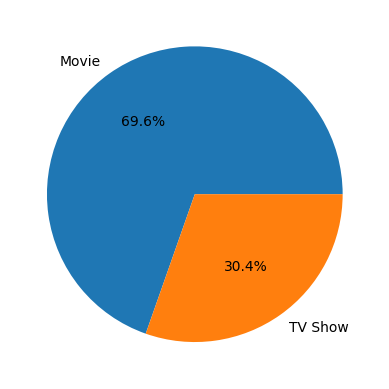

In [15]:
sizes=netflix_data["type"].value_counts().values
label=["Movie","TV Show"]
explode=[0,0.1]
plt.pie(sizes,labels=label,autopct='%1.1f%%')

**Segmentation of Netflix Dataset into TV Shows and Movies**

 the Netflix dataset is segmented into two distinct subsets: TV Shows and Movies. This segmentation is based on the 'type' column, which indicates whether a given entry is a "TV Show" or a "Movie."

In [16]:
tv_show = netflix_data[netflix_data['type']== 'TV Show']
movie = netflix_data[netflix_data['type']== 'Movie']

In [17]:
display(movie.head(4), '_')
display(tv_show.head(4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


'_'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
movies_df = netflix_data[netflix_data['type'] == 'Movie']
oldest_movie = movies_df[movies_df['release_year'] == movies_df['release_year'].min()]
oldest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


In [19]:
netflix_data['listed_in'].nunique()

514

**Top 5 Popular Genres**

The top 5 most popular genres in the dataset, based on the number of titles available on Netflix, are as follows:

1. International Movies with 2752 titles.
2. Dramas with 2427 titles.
3. Comedies with 1674 titles.
4. International TV Shows with 1351 titles.
5. Documentaries with 869 titles.

These genres have a significant presence in the Netflix content library, with International Movies being the most prominent, followed by Dramas and Comedies. International TV Shows and Documentaries also have a substantial number of titles available on the platform, making them among the top genres on Netflix.

In [20]:
genre_counts = netflix_data['listed_in'].str.split(', ').explode().value_counts()
top_5_genres = genre_counts.head(5)
print("Top 5 most popular genres:-", top_5_genres)

Top 5 most popular genres:- listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: count, dtype: int64


In [21]:
comedian_movies = netflix_data[netflix_data['listed_in'] == 'Comedies']

In [22]:
comedian_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
152,s153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,"September 1, 2021",2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
182,s183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,"September 1, 2021",2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...


**Top 5 popular actors**

The top 5 most popular actors in the dataset, based on the number of appearances in Netflix content, are as follows:

1. Anupam Kher with 43 appearances.
2. Shah Rukh Khan with 35 appearances.
3. Julie Tejwani with 33 appearances.
4. Naseeruddin Shah with 32 appearances.

These actors have a significant presence in Netflix content, with Anupam Kher being the most prolific with 43 appearances. It's clear that they are well-represented in the platform's offerings, making them prominent figures in the world of Netflix entertainment.

In [23]:
cast_counts = netflix_data['cast'].str.split(', ').explode().value_counts()
top_5_cast = cast_counts.head(5)
print("Top 5 most popular genres:-", top_5_cast)

Top 5 most popular genres:- cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Name: count, dtype: int64


In [24]:
recent_movie_data = netflix_data[['title', 'type', 'description']].iloc[0]
pd.set_option('display.max_colwidth', None)
print(recent_movie_data)

title                                                                                                                                              Dick Johnson Is Dead
type                                                                                                                                                              Movie
description    As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.
Name: 0, dtype: object


# visualizing

**Data Types Distribution in Netflix Dataset**

code generates a pie chart to visualize the distribution of data types within the Netflix dataset. Specifically, it provides insights into the number of columns in the dataset that belong to each data type category.

In [25]:
netflix_data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

**Netflix Content Release Year Distribution**

generates a histogram using the Plotly Express library to visualize the distribution of Netflix content based on the release year. Each bar in the histogram represents the count of content items released in a particular year. The 'release_year' column from the Netflix dataset is used as the x-axis, and each bar's color represents the corresponding release year.

In [26]:
fig = px.histogram(netflix_data,x="release_year", title="release_year", color="release_year")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

**Analysis of Netflix Content Categories**

performs an analysis of the content categories within the Netflix dataset. It aims to provide insights into the distribution and popularity of different content categories.

************************************************
 listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64 
************************************************


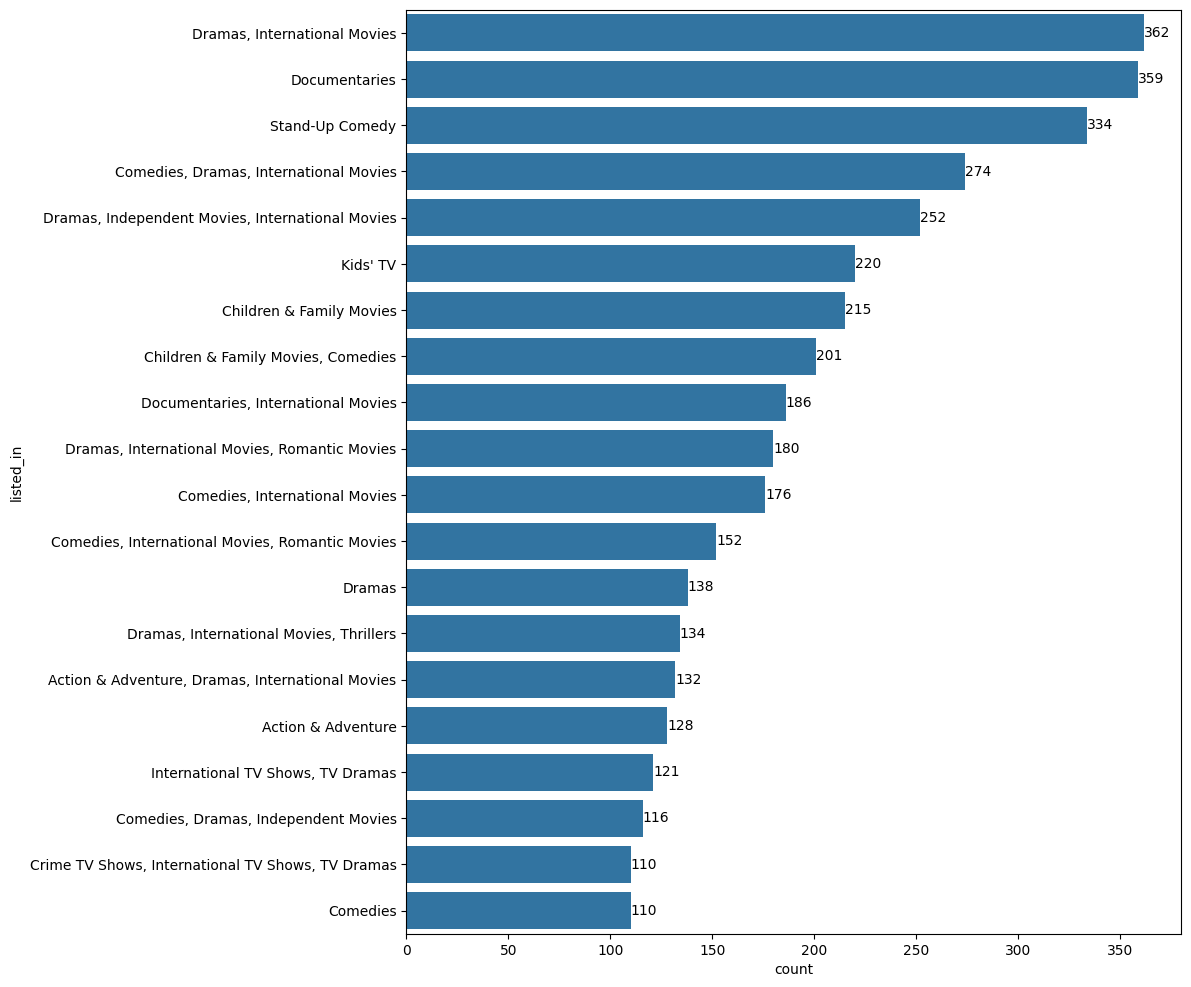

In [27]:
len(netflix_data['listed_in'].unique())
print('************************************************\n',netflix_data['listed_in'].value_counts(), '\n************************************************')
plt.figure(figsize=(10, 12))
ax = sns.countplot(data=netflix_data, y="listed_in", order=netflix_data['listed_in'].value_counts().index[0:20])
ax.bar_label(ax.containers[0])
plt.show()

# Featuring

**Data Type Segmentation in the Netflix Dataset**

the Netflix dataset is segmented into three groups based on the data types of the columns:

In [28]:
int_col = netflix_data.select_dtypes(include=('int')).columns
str_col = netflix_data.select_dtypes(include=('object')).columns
flt_col = netflix_data.select_dtypes(include=('float')).columns

**EDA: Distribution of Integer Columns by Content Type**


an exploratory data analysis is performed to analyze the distribution of integer columns in a dataset, differentiating between "TV Shows" and "Movies" as content types. The code accomplishes the following:

Index(['release_year'], dtype='object')
['release_year']


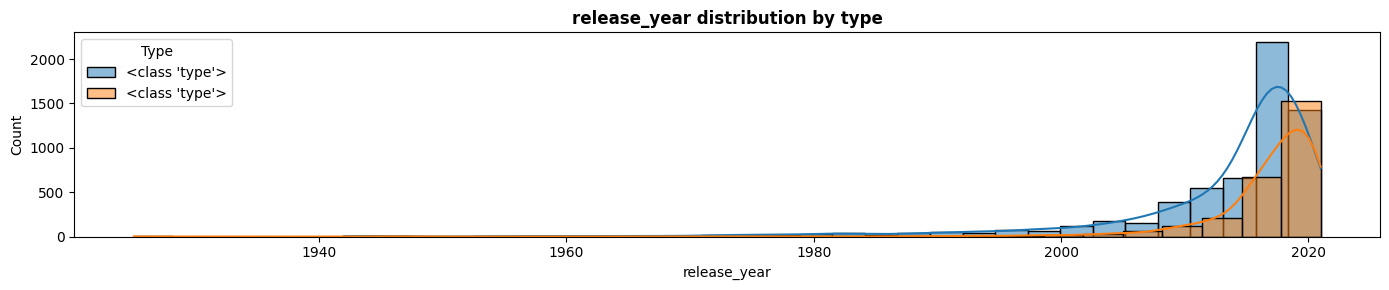

In [29]:
# Print the integer columns
print(int_col)

# Remove 'id' from int_col and create a new list
int_col_without_id = [col for col in int_col if col != 'id']

# Print the updated list
print(int_col_without_id)

# Get the unique values of the 'outcome' column
unique_outcomes = netflix_data['type'].unique()

# Create subplots
plt.figure(figsize=(14, len(int_col_without_id) * 3))

for i, col in enumerate(int_col_without_id):
    plt.subplot(len(int_col_without_id), 1, i+1)
    
    for outcome in unique_outcomes:
        sns.histplot(data=netflix_data[netflix_data['type'] == outcome], x=col, bins=30, kde=True, label=type)

    plt.title(f"{col} distribution by type", fontweight="bold")
    plt.xlabel(col)
    plt.legend(title='Type')
    
plt.tight_layout()
plt.show()

**Netflix Content Rating Distribution**

the Plotly library to create a histogram visualization of the distribution of content ratings in the Netflix dataset. The 'rating' column is used as the variable of interest on the x-axis, and different content ratings are color-coded for visual distinction.

In [30]:
fig = px.histogram(netflix_data,x="rating", title="Rating", color="rating")
# Update the layout and add box plots
fig.update_layout(
    bargap=0.2
)
fig.show()

In [31]:
len(netflix_data.duration.unique())

221

**Label Encoding Categorical Columns in Netflix Dataset**


Label encoding is a common technique used to convert categorical data into a format suitable for machine learning algorithms. It assigns a unique integer label to each unique category within a column. This encoding simplifies the representation of categorical data and allows it to be used in machine learning models that require numerical input. 

In [32]:
le = LabelEncoder()
for col in str_col:
    netflix_data[col] = le.fit_transform(netflix_data[col].astype('str'))

In [33]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,7246,603,1711,2020,7,210,274,2577
1,1111,1,1091,4303,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,736,1706,2021,11,0,242,7341
3,3333,1,3506,4303,7246,736,1706,2021,11,0,297,3617
4,4444,1,3861,4303,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,2007,8,70,269,895
8803,8672,1,8773,4303,7246,736,788,2018,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,2006,6,206,125,3315


([<matplotlib.patches.Wedge at 0x1d169ab12d0>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.6%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.4%')])

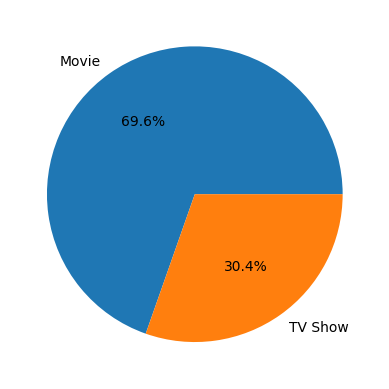

In [34]:
sizes=netflix_data["type"].value_counts().values
explode=[0,0.1]
plt.pie(sizes,labels=label,autopct='%1.1f%%')

In [35]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   show_id       8807 non-null   int32
 1   type          8807 non-null   int32
 2   title         8807 non-null   int32
 3   director      8807 non-null   int32
 4   cast          8807 non-null   int32
 5   country       8807 non-null   int32
 6   date_added    8807 non-null   int32
 7   release_year  8807 non-null   int64
 8   rating        8807 non-null   int32
 9   duration      8807 non-null   int32
 10  listed_in     8807 non-null   int32
 11  description   8807 non-null   int32
dtypes: int32(11), int64(1)
memory usage: 447.4 KB


# Training and Testing

**Data Preparation for Netflix Content Classification**

The separation of feature data (X) from the target variable (Y) is a fundamental step in machine learning and classification tasks. It allows for the training of classification models that predict the content type of Netflix entries based on the available features and attributes. 

In [36]:
x = netflix_data.drop(['type','description','cast','show_id','release_year','date_added'], axis='columns')
y = netflix_data[['type']]

In [37]:
x.head()

,title,director,country,rating,duration,listed_in
0,1975,2295,603,7,210,274
1,1091,4303,426,11,110,414
2,2651,2105,736,11,0,242
3,3506,4303,736,11,0,297
4,3861,4303,251,11,110,393


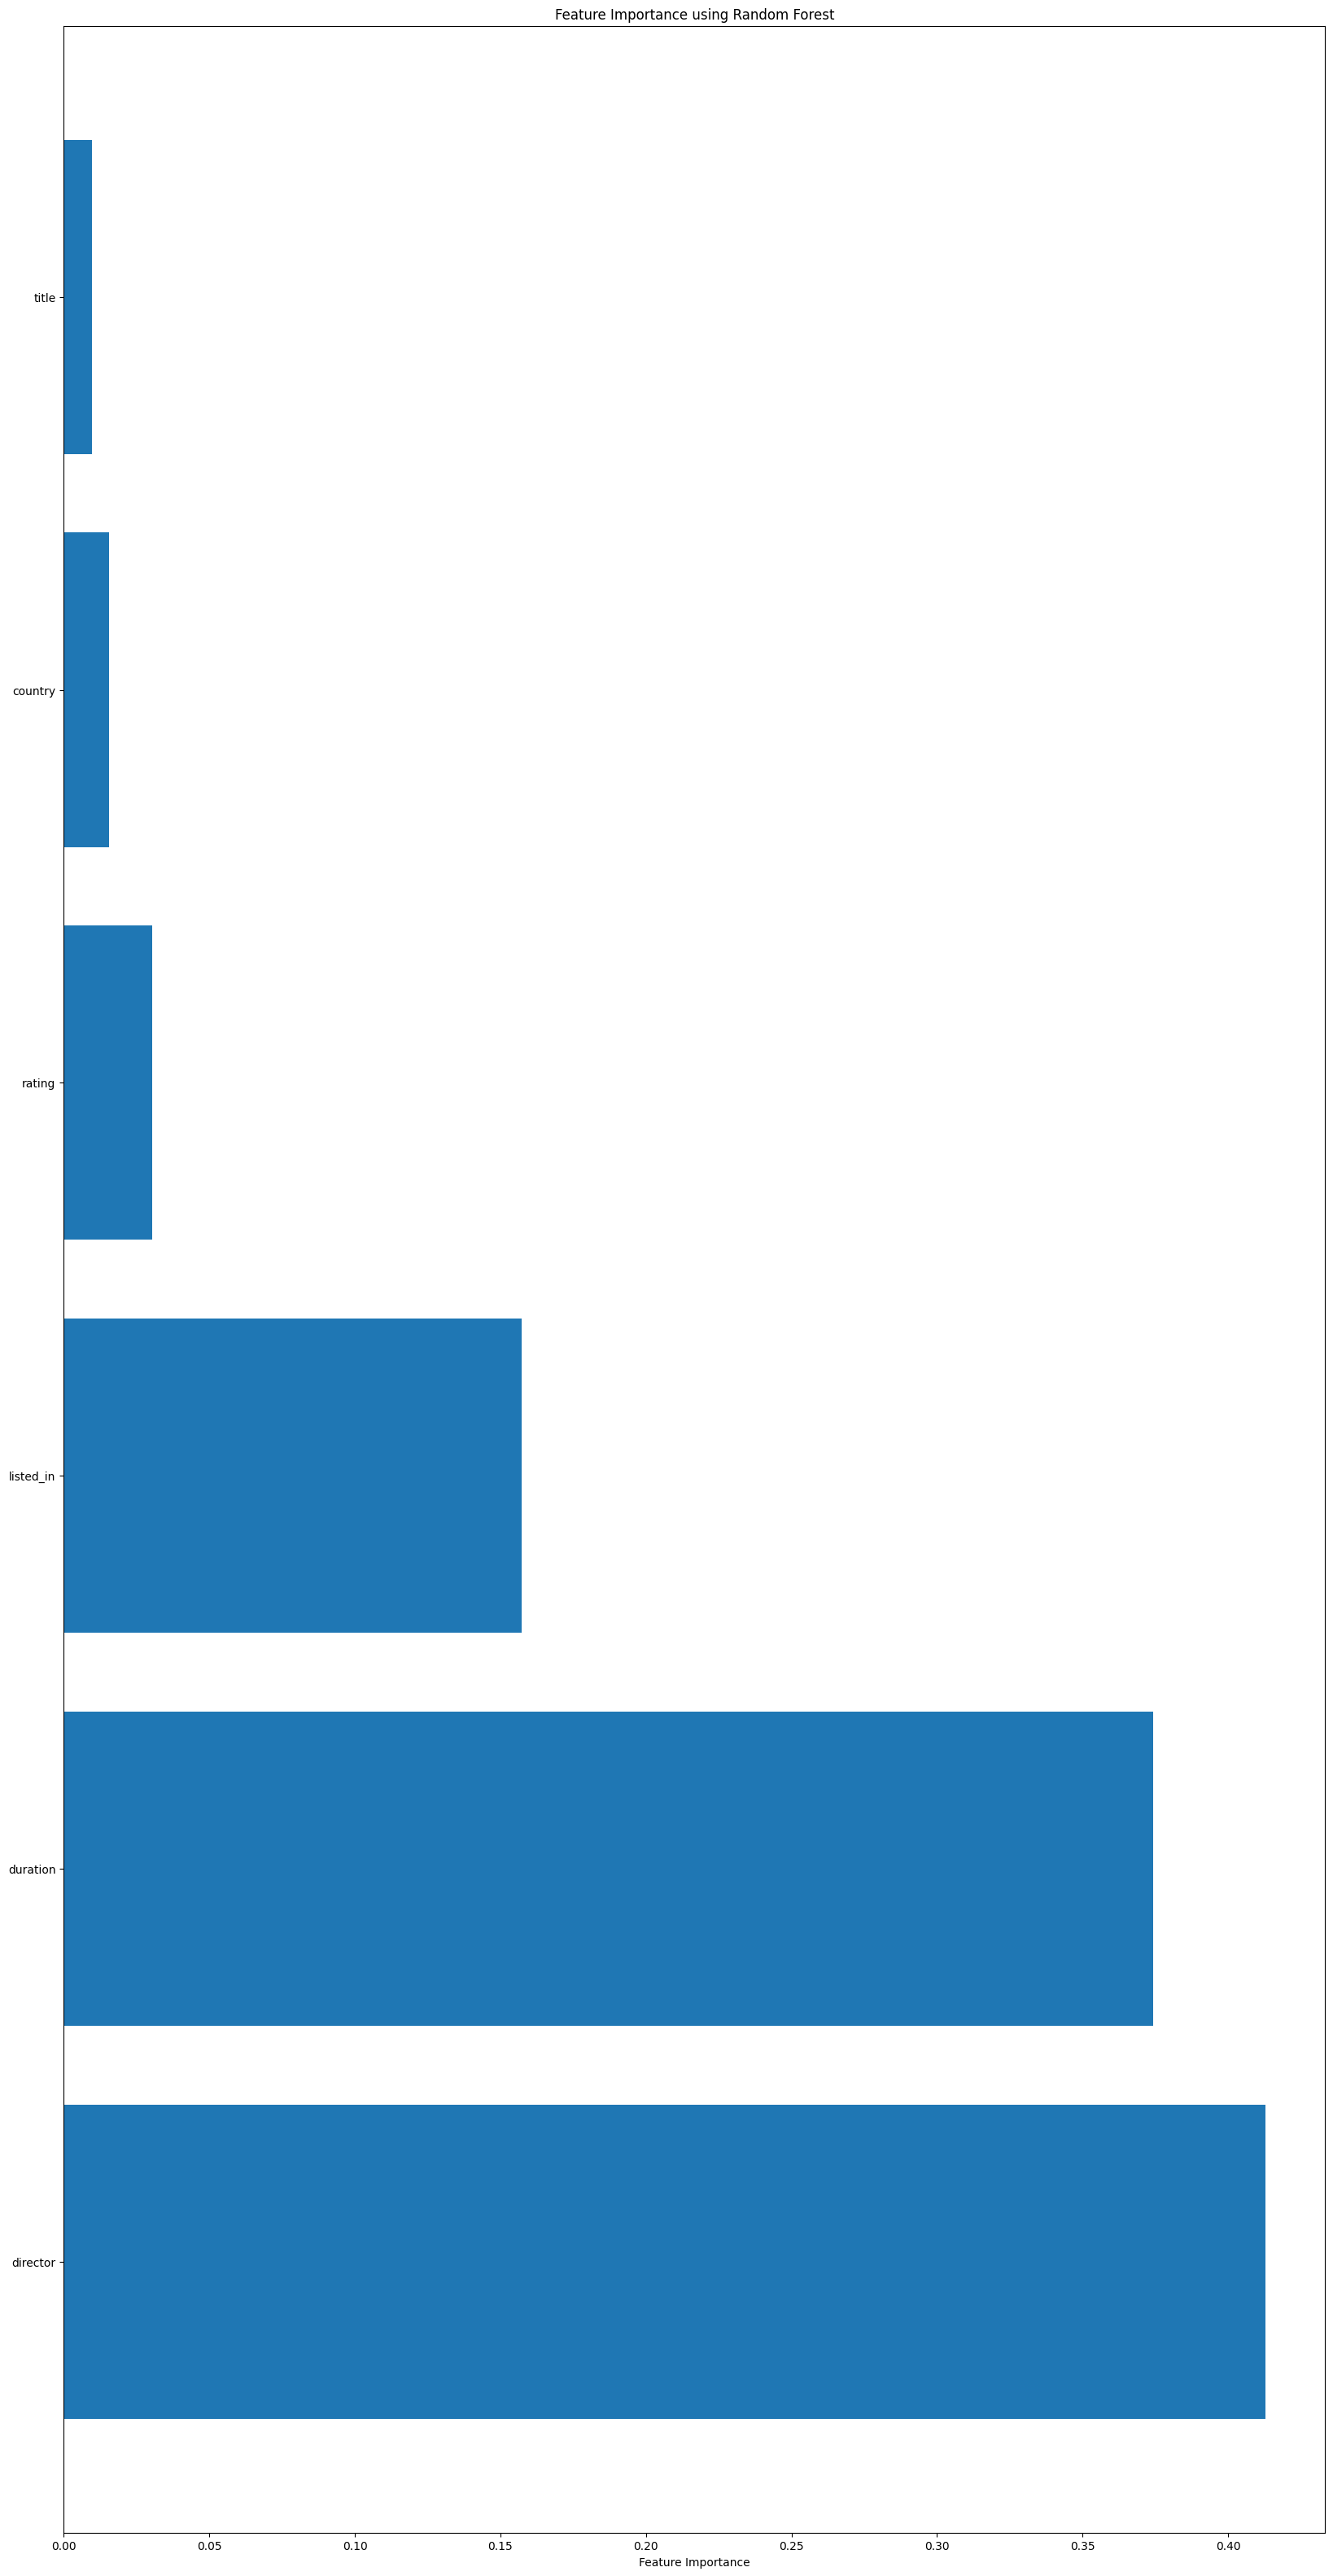

In [38]:
#finding important feature
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(x, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get column names
columns = x.columns

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(20,40))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

**Data Splitting into Training and Testing Sets**

Splitting the dataset into training and testing sets is a fundamental step in machine learning, allowing for the development and evaluation of predictive models.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Random Forest Classifier for Predictive Modeling**

In [40]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the RandomForestClassifier on the test set: {accuracy}")

Accuracy of the RandomForestClassifier on the test set: 0.9977298524404086


In [41]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # Assuming x_train, y_train, x_test, y_test are your training and testing data
# # Make sure to replace these with your actual data

# # Split the data into training and testing sets
# # x_train, x_test, y_train, y_test = train_test_split(...)

# # Create a RandomForestClassifier
# rf = RandomForestClassifier(random_state=0)

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model using GridSearchCV
# grid_search.fit(x_train, y_train)

# # Get the best parameters and the best estimator from the grid search
# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# # Print the best parameters
# print(f"Best Parameters: {best_params}")

# # Make predictions on the test set using the best estimator
# best_predictions = best_rf.predict(x_test)

# # Calculate accuracy on the test set
# best_accuracy = accuracy_score(y_test, best_predictions)
# print(f"Accuracy of the RandomForestClassifier on the test set: {best_accuracy}")


In [42]:
import pickle 
pickle.dump(rf,open('model.pkl','wb'))